In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.signal import find_peaks
from natsort import natsorted
COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (28, 18)
rcParams['figure.dpi'] = 50
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

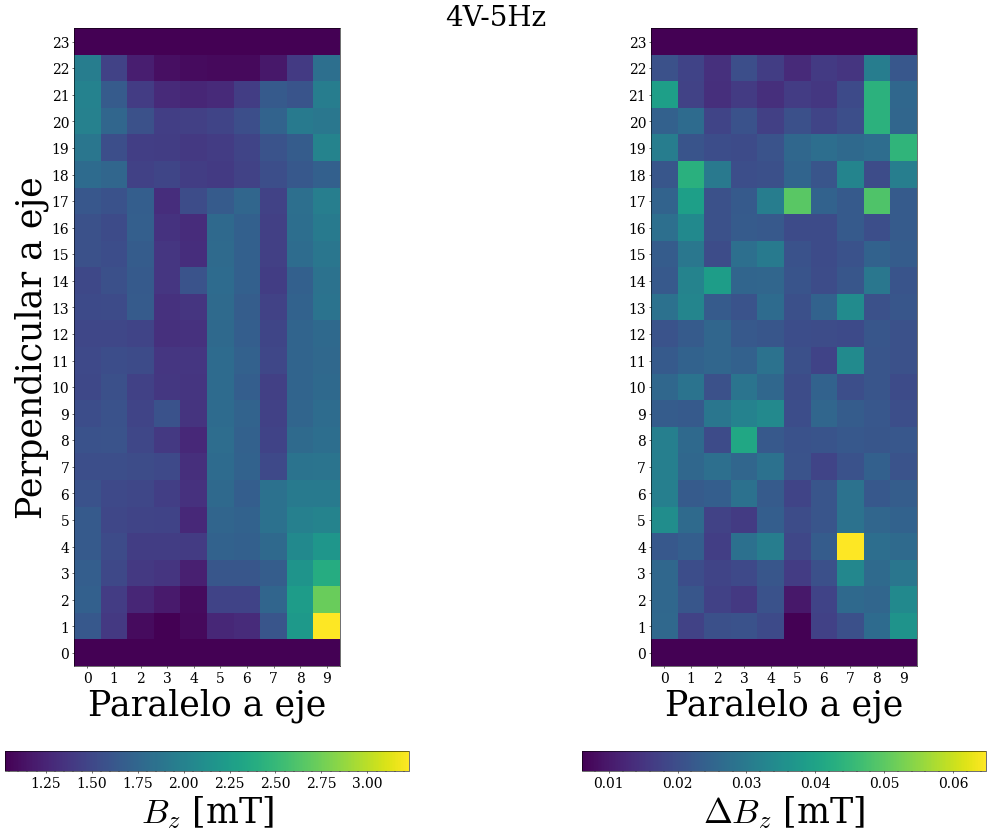

In [23]:
freq,volt = '5Hz','4V'
number_of_files = len(os.listdir(f'campo_x_hall/{volt}-{freq}/BZ'))
BZ = np.empty(number_of_files)
delta_BZ = np.empty(number_of_files)

for i,filename in enumerate(natsorted(os.listdir(f'campo_x_hall/{volt}-{freq}/BZ'))):
        df = pd.read_csv(f'campo_x_hall/{volt}-{freq}/BZ/{filename}', delimiter='\t', skiprows=[0,1,2])
        mag_field = df['(MT)'].to_numpy()
        mag_field -= mag_field.mean()
        xp = find_peaks(mag_field)[0]
        BZ[i] = mag_field[xp].mean()
        delta_BZ[i] = mag_field[xp].sem()

BZ = np.reshape(BZ, (22,10))
delta_BZ = np.reshape(delta_BZ, (22,10))

true_grid = np.zeros((24,10))
delta_true_grid = np.zeros((24,10))

true_grid[1:23,:][:,0:10] = BZ
delta_true_grid[1:23,:][:,0:10] = delta_BZ

norm = plt.Normalize(BZ.min(), BZ.max())
cmap = plt.colormaps.get_cmap('viridis')
delta_norm = plt.Normalize(delta_BZ.min(), delta_BZ.max())

fig = plt.figure()

fig.suptitle(f'{volt}-{freq}', fontsize=40)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

yticks = [i for i in np.arange(0, 23 +1)]
xticks = [i for i in np.arange(0, 9 + 1)]

cm = ax1.imshow(true_grid, cmap='viridis', interpolation='none', aspect='equal', norm=norm)
cb = fig.colorbar(cm, ax=ax1, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$B_z$ [mT]')
ax1.set_ylabel('Perpendicular a eje')
ax1.set_xlabel('Paralelo a eje')

cm = ax2.imshow(delta_true_grid, cmap='viridis', interpolation='none', aspect='equal', norm=delta_norm)
cb = fig.colorbar(cm, ax=ax2, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$\Delta B_z$ [mT]')
ax2.set_xlabel('Paralelo a eje')


ax1.set_xticks(xticks)
ax1.set_xticklabels([str(xt) for xt in xticks])

ax1.set_yticks(yticks)
ax1.set_yticklabels([str(yt) for yt in yticks])

ax1.set_ylim((-0.5,23.5))
ax1.set_xlim((-0.5,9.5))

ax2.set_xticks(xticks)
ax2.set_xticklabels([str(xt) for xt in xticks])

ax2.set_yticks(yticks)
ax2.set_yticklabels([str(yt) for yt in yticks])

ax2.set_ylim((-0.5,23.5))
ax2.set_xlim((-0.5,9.5))


fig.tight_layout()

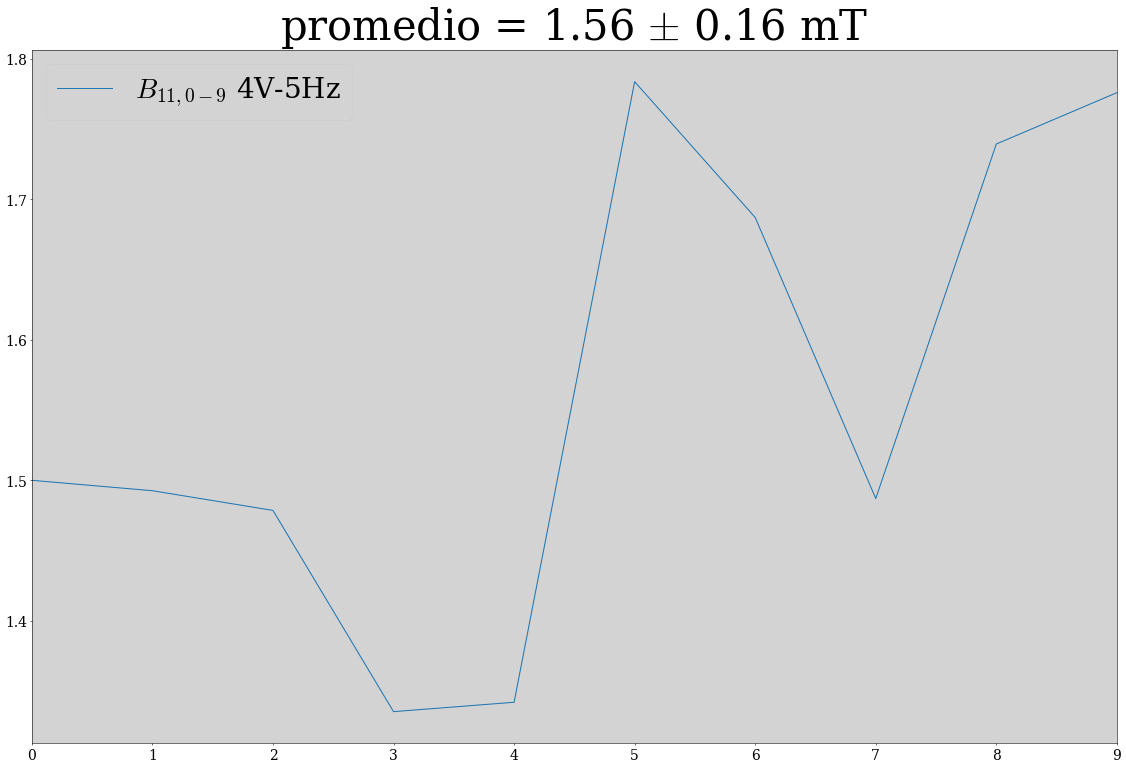

In [18]:
center_mag = BZ[11, :]
fig, ax = plt.subplots()
ax.plot(np.arange(0,9 + 1),center_mag, zorder=1, label='$B_{11,0-9}$ 4V-5Hz')
# plt.colorbar(mappable=plt.cm.ScalarMappable(norm = plt.Normalize(0,23), cmap='nipy_spectral'), ax=ax)
plt.title(f'promedio = {center_mag.mean():.2f} $\pm$ {center_mag.sem():.2f} mT')
plt.xlim([0,9])
plt.legend(fontsize=40)

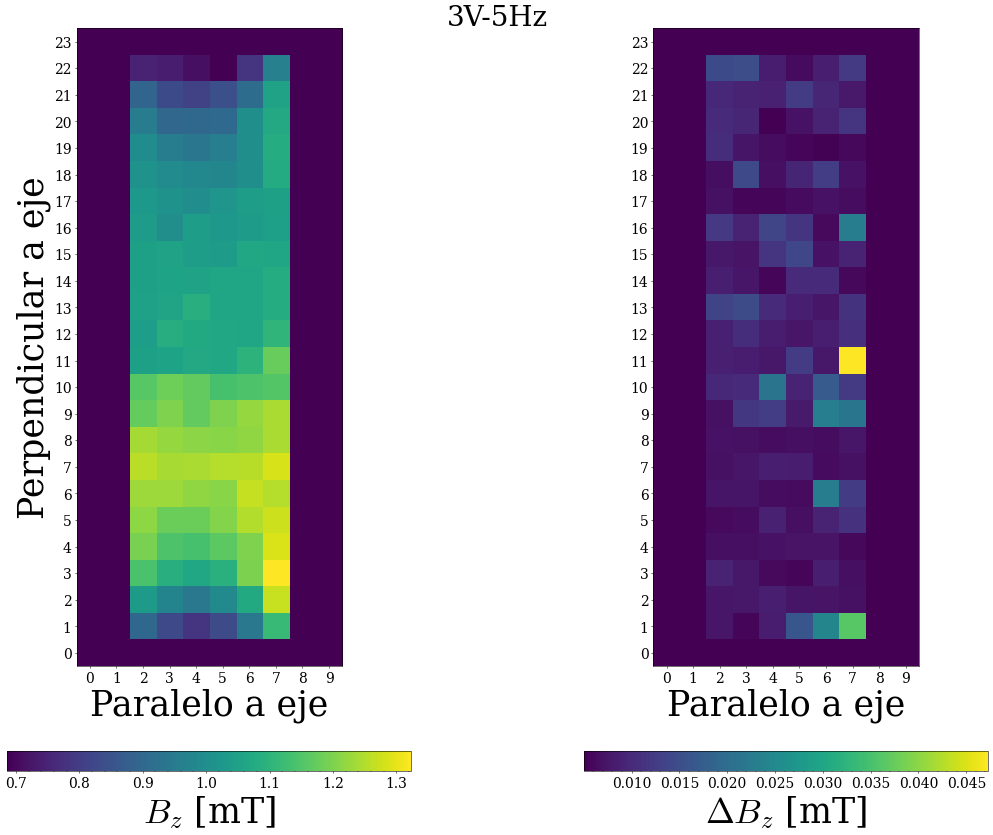

In [36]:
freq,volt = '5Hz','3V'
number_of_files = len(os.listdir(f'campo_x_hall/{volt}-{freq} [V1]/BZ'))
BZ = np.zeros(number_of_files)
delta_BZ = np.zeros(number_of_files)

for i,filename in enumerate(natsorted(os.listdir(f'campo_x_hall/{volt}-{freq} [V1]/BZ'))):
        df = pd.read_csv(f'campo_x_hall/{volt}-{freq} [V1]/BZ/{filename}', delimiter='\t', skiprows=[0,1,2])
        mag_field = df['(MT)'].to_numpy()
        mag_field -=mag_field.mean()
        xp = find_peaks(mag_field)[0]
        BZ[i] = mag_field[xp].mean()
        delta_BZ[i] = mag_field[xp].sem()

BZ = np.reshape(BZ, (22,6))
delta_BZ = np.reshape(delta_BZ, (22,6))

true_grid = np.zeros((24,10))
delta_true_grid = np.zeros((24,10))

index_filas = np.arange(1,22 + 1)
index_columnas = np.array([2,3,4,5,6,7])

for i in index_filas:
        for j in index_columnas:
                true_grid[i,j] = BZ[np.where(index_filas==i)[0][0],np.where(index_columnas==j)[0][0]]
                delta_true_grid[i,j] = delta_BZ[np.where(index_filas==i)[0][0],np.where(index_columnas==j)[0][0]]

fig = plt.figure()

fig.suptitle(f'{volt}-{freq}', fontsize=40)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

yticks = [i for i in np.arange(0, 23 + 1)]
xticks = [i for i in np.arange(0, 9 + 1)]

norm = plt.Normalize(BZ.min(), BZ.max())
cmap = plt.colormaps.get_cmap('viridis')

cm = ax1.imshow(true_grid, cmap=cmap, interpolation='none', aspect='equal', norm=norm)
cb = fig.colorbar(cm, ax=ax1, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$B_z$ [mT]')
ax1.set_ylabel('Perpendicular a eje')
ax1.set_xlabel('Paralelo a eje')

delta_norm = plt.Normalize(delta_BZ.min(), delta_BZ.max())


cm = ax2.imshow(delta_true_grid, cmap=cmap, interpolation='none', aspect='equal', norm=delta_norm)
cb = fig.colorbar(cm, ax=ax2, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$\Delta B_z$ [mT]')
ax2.set_xlabel('Paralelo a eje')


ax1.set_xticks(xticks)
ax1.set_xticklabels([str(xt) for xt in xticks])

ax1.set_yticks(yticks)
ax1.set_yticklabels([str(yt) for yt in yticks])

ax1.set_ylim((-0.5,23.5))
ax1.set_xlim((-0.5,9.5))

ax2.set_xticks(xticks)
ax2.set_xticklabels([str(xt) for xt in xticks])

ax2.set_yticks(yticks)
ax2.set_yticklabels([str(yt) for yt in yticks])

ax2.set_ylim((-0.5,23.5))
ax2.set_xlim((-0.5,9.5))


fig.tight_layout()

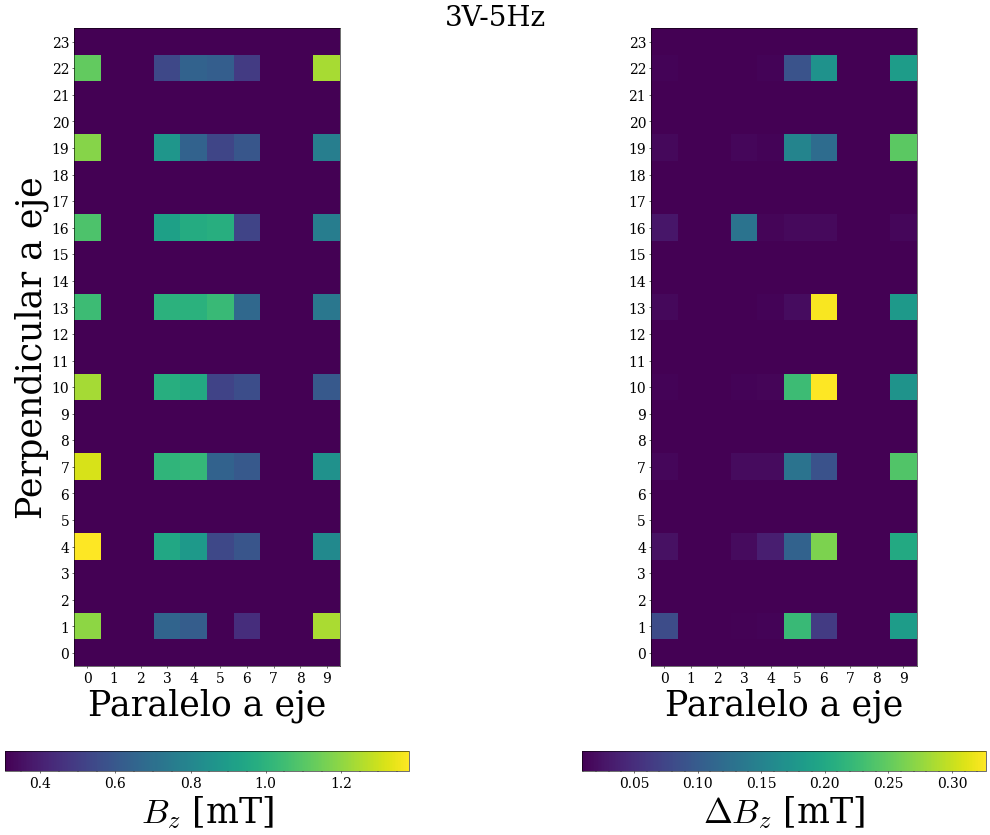

In [19]:
freq,volt = '5Hz','3V'
number_of_files = len(os.listdir(f'campo_x_hall/{volt}-{freq}/BZ'))
BZ = np.zeros(number_of_files)
delta_BZ = np.zeros(number_of_files)

for i,filename in enumerate(natsorted(os.listdir(f'campo_x_hall/{volt}-{freq}/BZ'))):
        df = pd.read_csv(f'campo_x_hall/{volt}-{freq}/BZ/{filename}', delimiter='\t', skiprows=[0,1,2])
        mag_field = df['(MT)'].to_numpy()
        mag_field -=mag_field.mean()
        xp = find_peaks(mag_field)[0]
        BZ[i] = mag_field[xp].mean()
        delta_BZ[i] = mag_field[xp].sem()

BZ = np.reshape(BZ, (8,6))
delta_BZ = np.reshape(delta_BZ, (8,6))

true_grid = np.zeros((24,10))
delta_true_grid = np.zeros((24,10))

index_filas = np.array([1,4,7,10,13,16,19,22])
index_columnas = np.array([0,3,4,5,6,9])

for i in index_filas:
        for j in index_columnas:
                true_grid[i,j] = BZ[np.where(index_filas==i)[0][0],np.where(index_columnas==j)[0][0]]
                delta_true_grid[i,j] = delta_BZ[np.where(index_filas==i)[0][0],np.where(index_columnas==j)[0][0]]

fig = plt.figure()

fig.suptitle(f'{volt}-{freq}', fontsize=40)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

yticks = [i for i in np.arange(0, 23 + 1)]
xticks = [i for i in np.arange(0, 9 + 1)]

norm = plt.Normalize(BZ.min(), BZ.max())
cmap = plt.colormaps.get_cmap('viridis')

cm = ax1.imshow(true_grid, cmap=cmap, interpolation='none', aspect='equal', norm=norm)
cb = fig.colorbar(cm, ax=ax1, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$B_z$ [mT]')
ax1.set_ylabel('Perpendicular a eje')
ax1.set_xlabel('Paralelo a eje')

delta_norm = plt.Normalize(delta_BZ.min(), delta_BZ.max())


cm = ax2.imshow(delta_true_grid, cmap=cmap, interpolation='none', aspect='equal', norm=delta_norm)
cb = fig.colorbar(cm, ax=ax2, location='bottom', shrink=0.5, pad=0.1)
cb.minorticks_on()
cb.set_label('$\Delta B_z$ [mT]')
ax2.set_xlabel('Paralelo a eje')


ax1.set_xticks(xticks)
ax1.set_xticklabels([str(xt) for xt in xticks])

ax1.set_yticks(yticks)
ax1.set_yticklabels([str(yt) for yt in yticks])

ax1.set_ylim((-0.5,23.5))
ax1.set_xlim((-0.5,9.5))

ax2.set_xticks(xticks)
ax2.set_xticklabels([str(xt) for xt in xticks])

ax2.set_yticks(yticks)
ax2.set_yticklabels([str(yt) for yt in yticks])

ax2.set_ylim((-0.5,23.5))
ax2.set_xlim((-0.5,9.5))


fig.tight_layout()

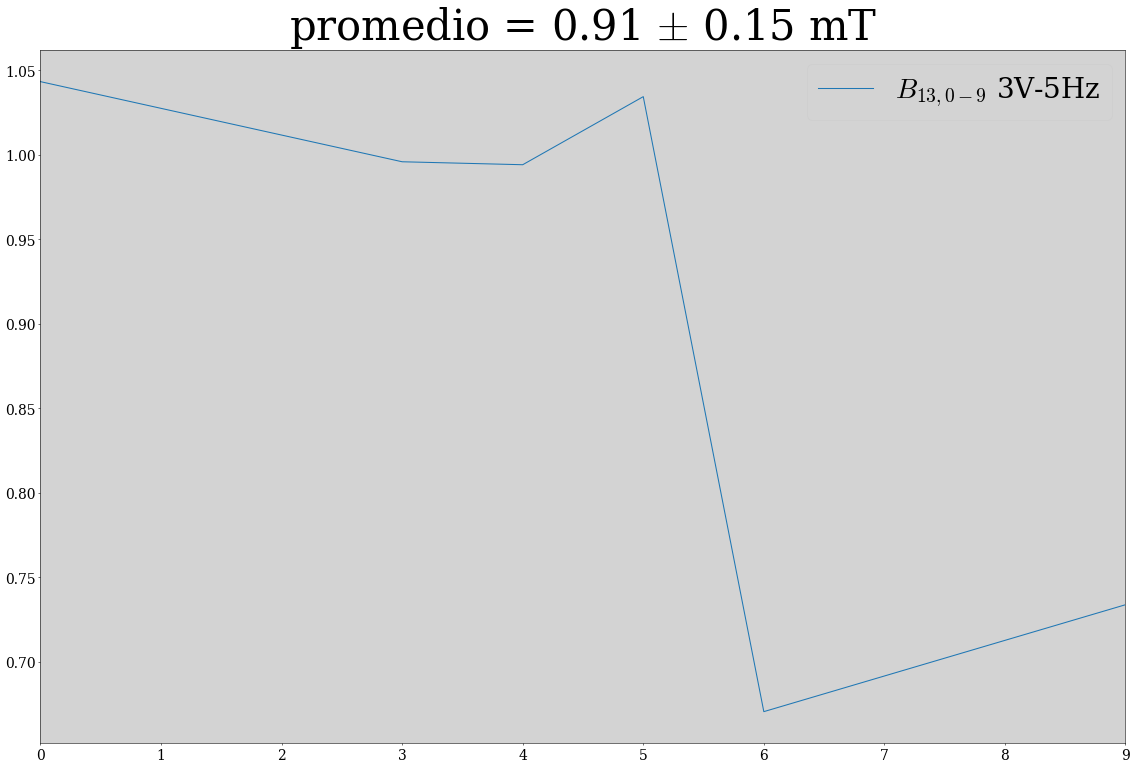

In [20]:
center_mag = BZ[4, :]
fig, ax = plt.subplots()
ax.plot([0,3,4,5,6,9],center_mag, zorder=1, label='$B_{13,0-9}$ 3V-5Hz')
# plt.colorbar(mappable=plt.cm.ScalarMappable(norm = plt.Normalize(0,23), cmap='nipy_spectral'), ax=ax)
plt.title(f'promedio = {center_mag.mean():.2f} $\pm$ {center_mag.sem():.2f} mT')
plt.xlim([0,9])
plt.legend(fontsize=40)

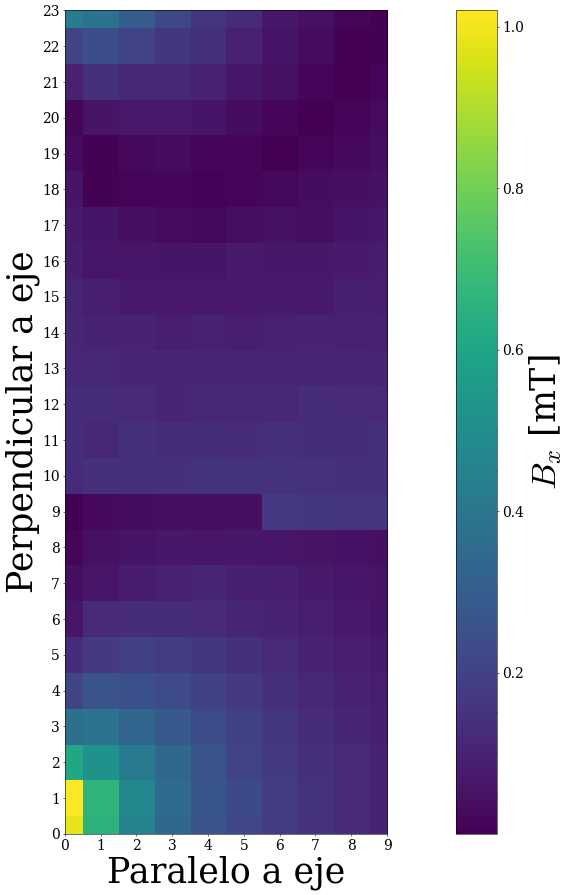

In [4]:
number_of_files = 24*10 #24 rows, 10 columns
avg_vals_BX = np.empty(number_of_files)

for n in np.arange(number_of_files):
    df = pd.read_csv('campo_x_hall/BX/'+str(n), delimiter='\t', skiprows=[0,1,2])
    avg_vals_BX[n] = np.abs(df['(MT)'].mean())

avg_vals_BX = np.reshape(avg_vals_BX, (24,10))
        
fig, ax = plt.subplots()

yticks = [i for i in range(24)]
xticks = [i for i in range(10)]

cm = ax.imshow(avg_vals_BX, cmap='viridis', interpolation='none')
cb = fig.colorbar(cm, ax=ax)
cb.minorticks_on()
cb.set_label('$B_x$ [mT]')
ax.set_ylabel('Perpendicular a eje')
ax.set_xlabel('Paralelo a eje')

ax.set_xticks(xticks)
ax.set_xticklabels([str(xt) for xt in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([str(yt) for yt in yticks])

ax.set_ylim((0,23))
ax.set_xlim((0,9))

fig.tight_layout()

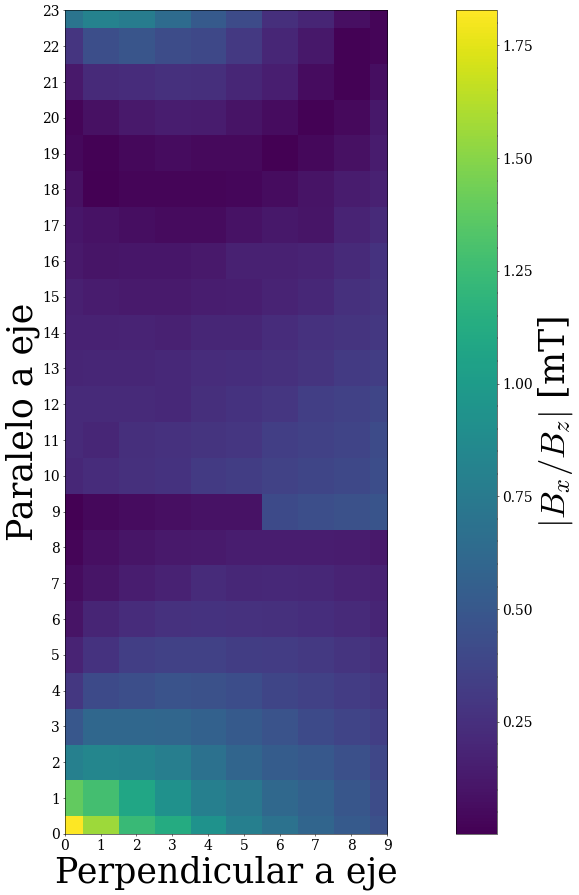

In [5]:
fig, ax = plt.subplots()

yticks = [i for i in range(24)]
xticks = [i for i in range(10)]

cm = ax.imshow(np.abs(avg_vals_BX/avg_vals_BZ), cmap='viridis', interpolation='none')
cb = fig.colorbar(cm, ax=ax)
cb.minorticks_on()
cb.set_label('$|B_x/B_z|$ [mT]')
ax.set_xlabel('Perpendicular a eje')
ax.set_ylabel('Paralelo a eje')

ax.set_xticks(xticks)
ax.set_xticklabels([str(xt) for xt in xticks])

ax.set_yticks(yticks)
ax.set_yticklabels([str(yt) for yt in yticks])

ax.set_ylim((0,23))
ax.set_xlim((0,9))

fig.tight_layout()